In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, ReLU, Flatten, Dropout, Dense, Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.layers import Input, Embedding, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean
import tensorflow as tf
# from tensorflow import InteractiveSession
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import os
from PIL import Image
import glob
from os import listdir
from os.path import isfile, join

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [447]:
df = pd.read_csv('test_assignment_sim.csv')
df

,FLOWFACTOR,SPACING,DEP TIME,TOOL,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,...,SITE_39,SITE_40,SITE_41,SITE_42,SITE_43,SITE_44,SITE_45,SITE_46,SITE_47,SITE_48
0,0.916,0.344,69.289,1,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593
1,0.916,0.344,69.289,2,1516.411140,1495.080373,1516.482818,1516.366352,1516.918855,1514.835611,...,1481.353478,1481.157584,1480.961690,1480.765797,1480.906328,1481.052943,1480.847698,1480.888354,1481.306459,1481.724561
2,0.916,0.344,69.289,3,1478.098433,1457.372553,1483.945610,1481.342541,1475.516841,1472.935249,...,1491.287428,1490.630367,1489.973305,1489.130805,1487.315196,1485.659583,1484.266940,1482.874286,1481.481632,1480.088988
3,0.916,0.344,69.289,4,1550.290615,1529.621080,1548.352252,1549.929704,1549.697136,1549.235110,...,1508.932376,1508.732902,1508.347436,1508.052235,1508.214925,1508.596579,1509.101775,1509.606975,1510.373006,1511.108004
4,0.957,0.348,70.253,1,1544.883218,1495.156181,1549.023309,1547.829132,1544.253208,1543.623198,...,1569.233533,1569.257056,1569.280579,1569.252501,1568.966865,1568.681228,1568.395593,1567.875699,1567.033903,1565.635512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.910,0.348,71.494,4,1579.678027,1554.131399,1582.133349,1581.752614,1578.538616,1576.167197,...,1591.884877,1593.910444,1595.920244,1597.930029,1599.939823,1601.064937,1602.044671,1602.274183,1602.330867,1602.387550
496,0.923,0.355,67.191,1,1506.290611,1444.277495,1505.734563,1505.713624,1506.867599,1507.444587,...,1485.450492,1484.933765,1484.315053,1483.920045,1483.788719,1483.811746,1484.540330,1485.410265,1486.280199,1487.150128
497,0.923,0.355,67.191,2,1433.885814,1401.300015,1441.602347,1437.744081,1430.923555,1428.490734,...,1390.019767,1389.793481,1389.567195,1389.669224,1389.903776,1390.894207,1390.904922,1391.148082,1392.018843,1392.553429
498,0.923,0.355,67.191,3,1385.057129,1355.168231,1387.311600,1384.319977,1384.609278,1382.555992,...,1358.969083,1357.977233,1356.985383,1355.993540,1355.001693,1354.009846,1353.018003,1352.026153,1351.034303,1350.042460


In [448]:
all_sites = ['SITE_0', 'SITE_1',
       'SITE_2', 'SITE_3', 'SITE_4', 'SITE_5', 'SITE_6', 'SITE_7', 'SITE_8',
       'SITE_9', 'SITE_10', 'SITE_11', 'SITE_12', 'SITE_13', 'SITE_14',
       'SITE_15', 'SITE_16', 'SITE_17', 'SITE_18', 'SITE_19', 'SITE_20',
       'SITE_21', 'SITE_22', 'SITE_23', 'SITE_24', 'SITE_25', 'SITE_26',
       'SITE_27', 'SITE_28', 'SITE_29', 'SITE_30', 'SITE_31', 'SITE_32',
       'SITE_33', 'SITE_34', 'SITE_35', 'SITE_36', 'SITE_37', 'SITE_38',
       'SITE_39', 'SITE_40', 'SITE_41', 'SITE_42', 'SITE_43', 'SITE_44',
       'SITE_45', 'SITE_46', 'SITE_47', 'SITE_48']

## Thickness Vector

Transforming feature columns to labels for GAN:

In [451]:
Y_COLUMNS = ['FLOWFACTOR', 'SPACING', 'DEP TIME']
scaler_y = MinMaxScaler(feature_range=(-1, 1))

y = df[Y_COLUMNS]
y_scaled = scaler_y.fit_transform(y)

tsne=TSNE()
y_tsne = tsne.fit_transform(y_scaled)

FLOWFACTOR


<IPython.core.display.Javascript object>


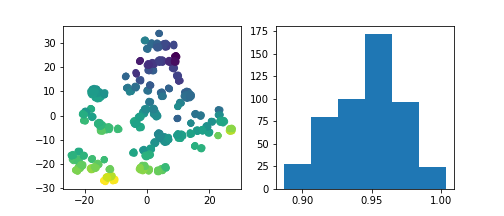

SPACING


<IPython.core.display.Javascript object>


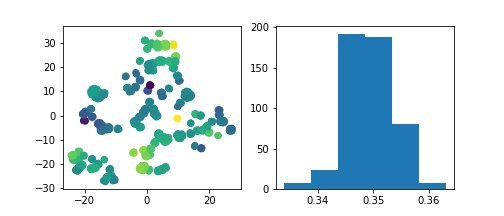

DEP TIME


<IPython.core.display.Javascript object>


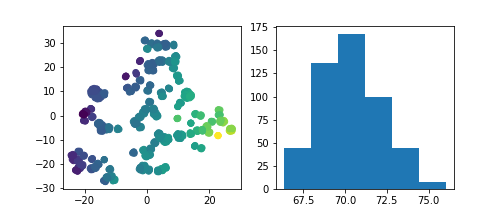

In [452]:
#number of bins per each extrinsic properties
BINS=6

for Y_column in Y_COLUMNS:
    print(Y_column)
    fig, axs= plt.subplots(1,2, figsize=(7,3))
    im=axs[0].scatter(y_tsne[:,0], y_tsne[:,1], c= df[Y_column]);
    h=axs[1].hist(df[Y_column], bins=BINS)
    plt.show()

binning_labels_dict={}
Y_COLUMNS_BINNING=[]
for Y_column in Y_COLUMNS:
    cnt, bins = np.histogram(df[Y_column], bins=BINS)
    bins[0] -= 1
    col_name = Y_column + "_binning"
    binning_labels_dict[col_name] = np.searchsorted(bins, df[Y_column].values)
    Y_COLUMNS_BINNING.append(col_name)

In [453]:
binning_df = pd.DataFrame(binning_labels_dict)#.groupby(col_name).count()
binning_df["T"] = 1
count_bins_df = binning_df.groupby(Y_COLUMNS_BINNING).count()
max_count = count_bins_df["T"].max()

df = pd.concat((df,binning_df),axis=1)
df = df.drop("T",axis=1)
count_bins_df = count_bins_df.reset_index()
df = pd.merge(df,count_bins_df,on=Y_COLUMNS_BINNING)
df["weight"] = max_count/df["T"]

In [454]:
df = pd.get_dummies(df, columns=['TOOL'] )

In [455]:
df

,FLOWFACTOR,SPACING,DEP TIME,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,SITE_6,...,SITE_48,FLOWFACTOR_binning,SPACING_binning,DEP TIME_binning,T,weight,TOOL_1,TOOL_2,TOOL_3,TOOL_4
0,0.916,0.344,69.289,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,1590.170593,2,3,2,8,3.0,1,0,0,0
1,0.916,0.344,69.289,1516.411140,1495.080373,1516.482818,1516.366352,1516.918855,1514.835611,1503.485462,...,1481.724561,2,3,2,8,3.0,0,1,0,0
2,0.916,0.344,69.289,1478.098433,1457.372553,1483.945610,1481.342541,1475.516841,1472.935249,1490.164818,...,1480.088988,2,3,2,8,3.0,0,0,1,0
3,0.916,0.344,69.289,1550.290615,1529.621080,1548.352252,1549.929704,1549.697136,1549.235110,1542.959522,...,1511.108004,2,3,2,8,3.0,0,0,0,1
4,0.916,0.348,69.402,1586.827374,1536.578580,1587.316760,1587.107206,1587.430629,1590.104267,1587.945422,...,1609.435433,2,3,2,8,3.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.953,0.352,73.086,1514.031349,1498.937449,1517.687851,1515.859600,1514.550610,1518.317762,1519.560080,...,1495.203398,4,4,5,4,6.0,0,0,0,1
496,0.923,0.355,67.191,1506.290611,1444.277495,1505.734563,1505.713624,1506.867599,1507.444587,1507.236026,...,1487.150128,2,5,1,4,6.0,1,0,0,0
497,0.923,0.355,67.191,1433.885814,1401.300015,1441.602347,1437.744081,1430.923555,1428.490734,1442.051871,...,1392.553429,2,5,1,4,6.0,0,1,0,0
498,0.923,0.355,67.191,1385.057129,1355.168231,1387.311600,1384.319977,1384.609278,1382.555992,1397.128710,...,1350.042460,2,5,1,4,6.0,0,0,1,0


In [456]:
Y_COLUMNS = ['FLOWFACTOR', 'SPACING', 'DEP TIME', 'TOOL_1', 'TOOL_2', 'TOOL_3', 'TOOL_4']

In [457]:
df

,FLOWFACTOR,SPACING,DEP TIME,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,SITE_6,...,SITE_48,FLOWFACTOR_binning,SPACING_binning,DEP TIME_binning,T,weight,TOOL_1,TOOL_2,TOOL_3,TOOL_4
0,0.916,0.344,69.289,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,1590.170593,2,3,2,8,3.0,1,0,0,0
1,0.916,0.344,69.289,1516.411140,1495.080373,1516.482818,1516.366352,1516.918855,1514.835611,1503.485462,...,1481.724561,2,3,2,8,3.0,0,1,0,0
2,0.916,0.344,69.289,1478.098433,1457.372553,1483.945610,1481.342541,1475.516841,1472.935249,1490.164818,...,1480.088988,2,3,2,8,3.0,0,0,1,0
3,0.916,0.344,69.289,1550.290615,1529.621080,1548.352252,1549.929704,1549.697136,1549.235110,1542.959522,...,1511.108004,2,3,2,8,3.0,0,0,0,1
4,0.916,0.348,69.402,1586.827374,1536.578580,1587.316760,1587.107206,1587.430629,1590.104267,1587.945422,...,1609.435433,2,3,2,8,3.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.953,0.352,73.086,1514.031349,1498.937449,1517.687851,1515.859600,1514.550610,1518.317762,1519.560080,...,1495.203398,4,4,5,4,6.0,0,0,0,1
496,0.923,0.355,67.191,1506.290611,1444.277495,1505.734563,1505.713624,1506.867599,1507.444587,1507.236026,...,1487.150128,2,5,1,4,6.0,1,0,0,0
497,0.923,0.355,67.191,1433.885814,1401.300015,1441.602347,1437.744081,1430.923555,1428.490734,1442.051871,...,1392.553429,2,5,1,4,6.0,0,1,0,0
498,0.923,0.355,67.191,1385.057129,1355.168231,1387.311600,1384.319977,1384.609278,1382.555992,1397.128710,...,1350.042460,2,5,1,4,6.0,0,0,1,0


In [458]:
BATCH_SIZE=16
batch_count = int(np.ceil(len(df)/BATCH_SIZE))

YS = []
WEIGHTS=[]
XS = []

for b in range(0, batch_count):
    print(b * BATCH_SIZE,"->",min(len(df), b * BATCH_SIZE+BATCH_SIZE) - 1)
    batch_indices = np.arange(b * BATCH_SIZE, min(len(df), b * BATCH_SIZE + BATCH_SIZE))
    for ind in batch_indices:              
        YS.append(df.loc[ind,Y_COLUMNS].values)
        WEIGHTS.append(df.loc[ind,"weight"])
        XS.append(df.loc[ind, all_sites].values)
YS = np.array(YS)
XS = np.array(XS)
WEIGHTS = np.array(WEIGHTS)

scaler_x = MinMaxScaler((-1, 1))
XS_scaled = scaler_x.fit_transform(XS)

scaler_y_2 = MinMaxScaler((-1, 1))
YS_scaled = scaler_y_2.fit_transform(YS)
dataset=(XS, YS_scaled, WEIGHTS)

0 -> 15
16 -> 31
32 -> 47
48 -> 63
64 -> 79
80 -> 95
96 -> 111
112 -> 127
128 -> 143
144 -> 159
160 -> 175
176 -> 191
192 -> 207
208 -> 223
224 -> 239
240 -> 255
256 -> 271
272 -> 287
288 -> 303
304 -> 319
320 -> 335
336 -> 351
352 -> 367
368 -> 383
384 -> 399
400 -> 415
416 -> 431
432 -> 447
448 -> 463
464 -> 479
480 -> 495
496 -> 499


In [459]:
INPUT_SHAPE=(49,)
EXTRINSIC_DIM = 7 #LABELS, Y
latent_dim = 49 # need to confirm
LATENT_DIM = latent_dim

## Discriminator Model

In [460]:
# define the standalone discriminator model
# @tf.function
def define_cond_discriminator(in_shape=INPUT_SHAPE, n_classes=EXTRINSIC_DIM):    
    # label input
    in_label = Input(shape=(EXTRINSIC_DIM,), name="Y_extrinsic")
    # scale up to image dimensions with linear activation
    n_nodes = in_shape[0]
    li = Dense(n_nodes)(in_label)

    # reshape to additional channel
#     li = Reshape((in_shape[0], in_shape[1], 1))(li)

    # vector input
    in_vec = Input(shape=in_shape, name="X")
    # concat label as a channel
    merge = Concatenate()([in_vec, li])
    
    fe = Dense(128)(merge)
    fe = BatchNormalization()(fe)
    fe = LeakyReLU()(fe)
    fe = Dropout(0.2)(fe)
   
    fe = Dense(64)(fe)
    fe = BatchNormalization()(fe)
    fe = LeakyReLU()(fe)
    fe = Dropout(0.2)(fe)
    
    # output
    out_layer = Dense(1, activation='sigmoid', name="Discriminator")(fe)
    # define model
    model = Model([in_vec, in_label], out_layer)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    #opt = Adadelta()

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [461]:
discriminator_model = define_cond_discriminator()

In [462]:
discriminator_model.metrics_names

[]

## Generator Model

In [463]:
def define_cond_generator(latent_dim=LATENT_DIM, n_classes=EXTRINSIC_DIM):
    init_size=(16,16) #random input shape

    # label input
    in_label = Input(shape=(EXTRINSIC_DIM,), name="Y_extrinsic")
    # linear multiplication
#     n_nodes = init_size[0] * init_size[1]
    li = Dense(7)(in_label)
    li = BatchNormalization()(li)
#     li = ReLU()(li)
#     li = Dropout(0.3)(li)

    # reshape to additional channel
#     li = Reshape((init_size[0] , init_size[1], 1))(li)

    # vector generator input
    in_lat = Input(shape=(latent_dim,), name="Z_latent")

    gen = Dense(128)(in_lat)
    gen = BatchNormalization()(gen)
    gen = LeakyReLU()(gen)
    gen = Dropout(0.3)(gen)

    merge = Concatenate()([gen, li])

    gen = Dense(128)(merge)
    gen = BatchNormalization()(gen)
    gen = LeakyReLU()(gen)
    gen = Dropout(0.3)(gen)

    gen = Dense(64)(gen)
    gen = BatchNormalization()(gen)
    gen = LeakyReLU()(gen)
    gen = Dropout(0.3)(gen)

    # output
    out_layer = Dense(49, activation='tanh', name="X_generated")(gen)

    # define model
    model = Model([in_lat, in_label], out_layer)
    return model

In [464]:
generator_model = define_cond_generator()   
    

In [465]:
generator_model.losses

[]

## Combine generator and discriminator model

In [466]:
def define_cond_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # get noise and label inputs from generator model
    gen_noise, gen_label = g_model.input
    # get vector output from the generator model
    gen_output = g_model.output
    # connect vector output and label input from generator as inputs to discriminator
    gan_output = d_model([gen_output, gen_label])
    # define gan model as taking noise and label and outputting a classification
    model = Model([gen_noise, gen_label], gan_output)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [467]:
GAN = define_cond_gan(generator_model, discriminator_model)

# Generate Real and Fake Samples:

In [468]:

# select real samples
def generate_real_samples(dataset, n_samples):
    # split into vector and labels
    vector, labels, weights = dataset
    # choose random instances
    ix = np.random.randint(0, vector.shape[0]-1, n_samples) # n_samples were removed I dunno why
    # select vector and labels
    X, labels, weights = vector[ix], labels[ix], weights[ix]
    # generate class labels
    y = np.ones((n_samples, 1))
    return [X, labels], y, weights

In [469]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=EXTRINSIC_DIM):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = np.random.choice(len(YS), size=n_samples)
    weights = WEIGHTS[labels]
    labels= YS_scaled[labels]    
    return z_input, labels, weights

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input, labels_input, weights_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict([z_input, labels_input])
    # create class labels
    y = np.zeros((n_samples, 1))
    return [images, labels_input], y, weights_input

In [470]:
# function for trainining of generator and discriminator
def train_cgan(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=32, verbose_freq=10, n_batch=32):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    # manually enumerate epochs
    d_loss1_epochs=[]
    d_loss2_epochs=[]
    g_loss_epochs=[]
    d_loss1_batch=[]
    d_loss2_batch=[]
    g_loss_batch=[]
    
    
    # manually enumerate epochs
    iteration=0
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            [X_real, labels_real], y_real, weights_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real,) #sample_weight=weights_real)
            # generate 'fake' examples
            [X_fake, labels], y_fake, weights_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake,) #sample_weight=weights_fake)
            # prepare points in latent space as input for the generator
            z_input, labels_input, weights_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan,) #sample_weight=weights_gan)
            
            d_loss1_batch.append(d_loss1)
            d_loss2_batch.append(d_loss2)
            g_loss_batch.append(g_loss)
        

            # visualizing the training steps
            if (iteration%verbose_freq==0):
                if ax.lines:
                    epochs_x = (np.arange(len(d_loss2_batch))+1)/bat_per_epo
                    for line,ydata in zip(ax.lines,[d_loss1_batch, d_loss2_batch,g_loss_batch]):
                        line.set_xdata(epochs_x)
                        line.set_ydata(ydata) 
                    ax.set_xlim(0,max(epochs_x) + 1/bat_per_epo)
                    ax.set_ylim(0.9 * min([min(d_loss1_batch), min(d_loss2_batch), min(g_loss_batch)]), 1.1 * max([max(d_loss1_batch), max(d_loss2_batch), max(g_loss_batch)]))
                else:
                    ax.plot(d_loss1_batch, label="d_loss_real")
                    ax.plot(d_loss2_batch, label="d_loss_fake")
                    ax.plot(g_loss_batch, label="g_loss")                 
                    fig.legend()
                fig.canvas.draw()
                
            iteration += 1
            
    if ax.lines:        
        epochs_x=(np.arange(len(d_loss2_batch))+1)/bat_per_epo
        for line,ydata in zip(ax.lines,[d_loss1_batch, d_loss2_batch,g_loss_batch]):
            line.set_xdata(epochs_x)
            line.set_ydata(ydata) 
        ax.set_xlim(0,max(epochs_x)+1/bat_per_epo)
        ax.set_ylim(0.9*min([min(d_loss1_batch),min(d_loss2_batch),min(g_loss_batch)]),1.1*max([max(d_loss1_batch), max(d_loss2_batch), max(g_loss_batch)]))
    else:
        ax.plot(d_loss1_batch, label="d_loss_real")
        ax.plot(d_loss2_batch, label="d_loss_fake")
        ax.plot(g_loss_batch, label="g_loss")                 
        fig.legend()
    fig.canvas.draw()

train model for 224
0
125.0


<IPython.core.display.Javascript object>


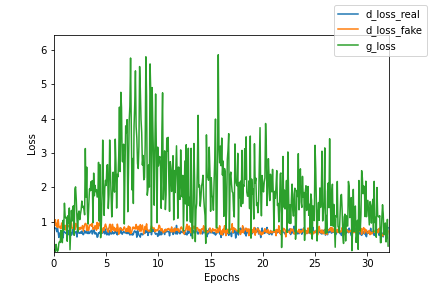

1
250.0


<IPython.core.display.Javascript object>


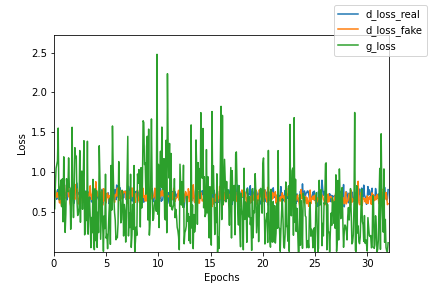

2
375.0


<IPython.core.display.Javascript object>


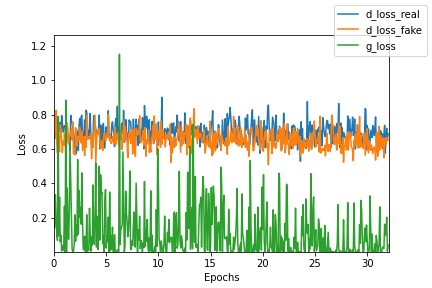

3
500.0


<IPython.core.display.Javascript object>


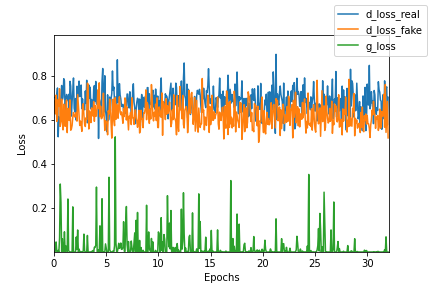

4
625.0


<IPython.core.display.Javascript object>


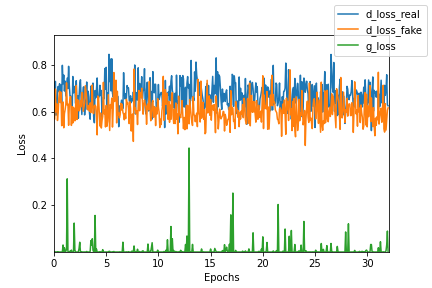

5
750.0


<IPython.core.display.Javascript object>


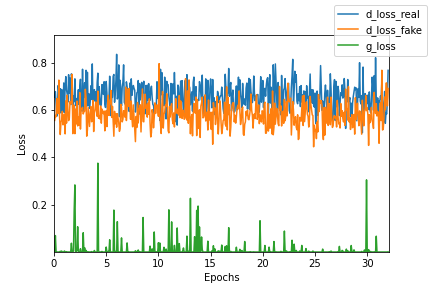

6
875.0


<IPython.core.display.Javascript object>


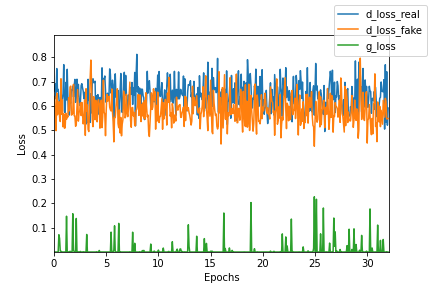

In [471]:
%matplotlib notebook
# train model
n_runs = 7
total_batch = 0
total_epochs = 0
n_batch = 128
n_epochs = 32

print('train model for ' + str(n_runs * n_epochs))
for k in range(n_runs):
    print(k)
    total_batch = total_batch + (dataset[0].shape[0] / n_batch) * n_epochs
    print(total_batch)
    train_cgan(generator_model, discriminator_model, GAN, dataset, latent_dim)


    # save models
savename = 'semicon'
generator_model.save(savename + '_generator.h5')
discriminator_model.save(savename + '_discriminator.h5')
GAN.save(savename + '_gan.h5')


In [472]:
def create_process_vector(features):
    features =np.array(features).reshape(1, -1)
    process_vector = scaler_y_2.transform(features)
    return process_vector

In [496]:
latent_points, labels, _ = generate_latent_points(49, num_pred)
del labels
pp = create_process_vector(YS[100])
X_test = generator_model.predict([latent_points, pp])
X_test
# # X_test = tanh(X_test) 
# X_test = sigmoid(X_test)
# X_test = scaler_x.inverse_transform(X_test)

array([[ 0.7472399 , -0.7081686 , -0.61266154, -0.87326574,  0.9057217 ,
         0.07454369, -0.24231541,  0.44036037,  0.4705716 ,  0.6943106 ,
         0.2133974 , -0.43700796,  0.7578793 , -0.72090906,  0.74987006,
         0.46737638,  0.05219947,  0.73150027,  0.17795251,  0.80361426,
         0.19702469, -0.85989547, -0.20385325,  0.75567365,  0.59252363,
         0.14644808, -0.5638532 ,  0.34102157, -0.5573347 , -0.7726795 ,
         0.15333353, -0.85008514,  0.5698838 , -0.73567015,  0.21218956,
         0.06257051,  0.53673023, -0.552412  , -0.8815716 , -0.45508468,
         0.29039776,  0.5631315 , -0.761057  ,  0.6053447 ,  0.72807974,
        -0.13848336, -0.19012122,  0.5703116 ,  0.9056304 ]],
      dtype=float32)

In [479]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t
X_test =scaler_x.inverse_transform(tanh(X_test))
X_test

C:\Users\Khamir\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in exp

C:\Users\Khamir\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide



array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [481]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
X_test = scaler_x.inverse_transform(sigmoid(X_test))

In [330]:
import plotly.figure_factory as ff
from scipy.spatial import Delaunay

def visualize(thickness):
    site = pd.read_csv('site_coordinates.csv')
    site['SITE_Z'] = thickness
    points2D = np.vstack([site['SITE_X'], site['SITE_Y']]).T
    tri = Delaunay(points2D)
    simplices = tri.simplices

    fig = ff.create_trisurf(site['SITE_X'], site['SITE_Y'], site['SITE_Z'],
                             simplices=simplices,
                             title="wafare", aspectratio=dict(x=1, y=1, z=0.5))
    fig.show()


In [495]:
visualize(XS[100])
visualize(X_test[0])